<div style="background: linear-gradient(135deg, #d1f7ec, #b0f4e6); 
            color: #2e4b4b; 
            padding: 40px; 
            text-align: center; 
            border-radius: 20px; 
            margin-bottom: 30px;
            box-shadow: 0 4px 15px rgba(0,0,0,0.08);">

  <h1 style="font-size: 40px; margin-bottom: 10px; letter-spacing: 1px;">
    📊 Price Optimization Analysis Notebook
  </h1>
  
  <p style="font-size: 18px; margin: 0; opacity: 0.8;">
    Data-driven insights for smarter pricing and revenue decisions
  </p>

</div>

<!-- ========================== PROJECT OVERVIEW + TABLE OF CONTENTS ========================== -->
<div style="padding:25px; border-radius:15px; background:#ecfdf5; border:2px solid #a7f3d0;">

  <!-- 🌟 PROJECT OVERVIEW -->
  <h1 style="color:#008b64; text-align:center; margin-bottom:20px;">
    🌟 Project Overview
  </h1>

  <p style="font-size:16px; line-height:1.6; color:#333; text-align:justify;">
    This project aims to identify the optimal product pricing strategy by leveraging data-driven insights.
    Starting from data preprocessing and exploratory analysis, we move on to price elasticity modeling to
    understand demand sensitivity, followed by revenue optimization to estimate the price that maximizes revenue.
    We then validate this pricing strategy through a simulated A/B test and finally present actionable insights
    for decision-making.
  </p>

  <hr style="border: 1px solid #c7e0f4; margin: 30px 0;">

  <!-- 📑 TABLE OF CONTENTS -->
  <h2 style="color:#028174; margin-bottom:15px;">📑 Table of Contents</h2>

  <ul style="list-style-type:none; padding-left:0; font-size:16px; line-height:1.8;">
    <li>🔧 <a href="#data-preprocessing" style="color:#028174; text-decoration:none;">Data Preprocessing</a></li>
    <li>📊 <a href="#eda" style="color:#028174; text-decoration:none;">Exploratory Data Analysis (EDA)</a></li>
    <li>📈 <a href="#price-elasticity-modeling" style="color:#028174; text-decoration:none;">Price Elasticity Modeling</a></li>
    <li>💰 <a href="#revenue-optimization" style="color:#028174; text-decoration:none;">Revenue Optimization</a></li>
    <li>🧪 <a href="#ab-testing-simulation" style="color:#028174; text-decoration:none;">A/B Testing Simulation</a></li>
    <li>📝 <a href="#conclusion" style="color:#028174; text-decoration:none;">Conclusion</a></li>
  </ul>

</div>
<!-- ========================================================================================== -->


### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
df = pd.read_csv("../data/Competition_Data.csv")

In [4]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


### Checking the size of dataset

In [5]:
df.shape

(100000, 9)

### Getting the summary of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


### Getting the statistical summary of dataset

In [7]:
df.describe()

,Index,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,167.017783,399.611320,4771.147859,11396.865217,174.280887
std,28867.657797,69.503418,59.440567,1524.737540,2091.246764,71.545584
min,0.000000,47.700000,285.000000,2003.700000,7613.560000,47.950000
25%,24999.750000,105.410000,348.000000,3481.460000,9551.590000,118.627500
50%,49999.500000,159.420000,401.000000,4746.530000,11240.020000,162.510000
75%,74999.250000,221.900000,451.000000,6045.477500,13175.230000,237.335000
max,99999.000000,310.660000,522.000000,7853.810000,15685.080000,313.640000


<div id="preprocessing"></div>

<div id="preprocessing"></div>

<div style="background: linear-gradient(135deg, #A8E6CF, #DCEDC1); padding:25px; border-radius:15px; box-shadow:0 3px 8px rgba(0,0,0,0.1);">
  <h1 style="text-align:center; color:#2C786C; font-size:30px;">⚙️ Data Preprocessing</h1>
  <p style="text-align:center; color:#2C786C; font-size:15px;">Cleaning and preparing raw data for analysis</p>
</div>

### Checking for Null Values

In [8]:
df.isnull().sum()

Index                       0
Fiscal_Week_ID              0
Store_ID                    0
Item_ID                     0
Price                       0
Item_Quantity               0
Sales_Amount_No_Discount    0
Sales_Amount                0
Competition_Price           0
dtype: int64

### Checking the datatypes of columns

In [9]:
df.dtypes

Index                         int64
Fiscal_Week_ID               object
Store_ID                     object
Item_ID                      object
Price                       float64
Item_Quantity                 int64
Sales_Amount_No_Discount    float64
Sales_Amount                float64
Competition_Price           float64
dtype: object

### Checking for duplicate rows 

In [10]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows in the dataset:")
print(duplicate_rows)

Duplicate rows in the dataset:
Empty DataFrame
Columns: [Index, Fiscal_Week_ID, Store_ID, Item_ID, Price, Item_Quantity, Sales_Amount_No_Discount, Sales_Amount, Competition_Price]
Index: []


### Checking for duplicates rows on the basis of Index column

In [11]:
duplicates = df[df.duplicated(subset='Index', keep=False)]

# Displaying them
print(f"Total duplicate entries: {len(duplicates)}")
duplicates.head()

Total duplicate entries: 0


,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price


### Checking for Outliers

In [12]:
numeric_cols = ['Price', 'Item_Quantity', 'Sales_Amount_No_Discount', 'Sales_Amount', 'Competition_Price']

# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col}: {len(outliers)} outliers')
    return outliers

# Check for all numeric columns
for col in numeric_cols:
    detect_outliers(df, col)

Price: 0 outliers
Item_Quantity: 0 outliers
Sales_Amount_No_Discount: 0 outliers
Sales_Amount: 0 outliers
Competition_Price: 0 outliers


### Feature Engineering

In [13]:
# 1. Revenue
df['Revenue'] = df['Price'] * df['Item_Quantity']

# 2. Discount Impact
df['Discount_Impact'] = df['Sales_Amount_No_Discount'] - df['Sales_Amount']
df['Discount_Percentage'] = np.where(df['Sales_Amount_No_Discount'] > 0,(df['Discount_Impact'] / df['Sales_Amount_No_Discount']) * 100,0)

# 3. Competition Effect
df['Price_Diff'] = df['Price'] - df['Competition_Price']
df['Price_vs_Competition'] = np.where(df['Competition_Price'] > 0,(df['Price'] / df['Competition_Price']) - 1, 0)

# 4. Unit Revenue
df['Revenue_per_Unit'] = np.where(df['Item_Quantity'] > 0, df['Revenue'] / df['Item_Quantity'], 0)

# 5. Week Features
df['Year'] = df['Fiscal_Week_ID'].str.split('-').str[0].astype(int)
df['Week'] = df['Fiscal_Week_ID'].str.split('-').str[1].astype(int)

In [14]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,Revenue,Discount_Impact,Discount_Percentage,Price_Diff,Price_vs_Competition,Revenue_per_Unit,Year,Week
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44,58503.15,-6555.85,-138.991125,-71.95,-0.348527,134.49,2019,11
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01,58503.15,-6555.85,-138.991125,-23.52,-0.148851,134.49,2019,11
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03,58503.15,-6555.85,-138.991125,-143.54,-0.516275,134.49,2019,11
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66,58503.15,-6555.85,-138.991125,-88.17,-0.395985,134.49,2019,11
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32,58503.15,-6555.85,-138.991125,-60.83,-0.311438,134.49,2019,11



<div style="font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial; max-width:720px;">
  <h2 style="margin-bottom:6px;">Data Quality Check Summary</h2>
  <p style="margin-top:0.2rem; color:#555;">Summary of automated & manual checks performed on the dataset</p>

  <ul style="list-style:none; padding-left:0; margin-top:0.6rem;">
    <li style="margin:8px 0; display:flex; align-items:flex-start;">
      <span style="color:#16a34a; font-weight:700; margin-right:10px; font-size:18px;">✔</span>
      <div>
        <strong>No missing values</strong>
        <div style="color:#444; font-size:0.95rem;">All required fields were present — no NaNs or nulls found.</div>
      </div>
    </li>

<li style="margin:8px 0; display:flex; align-items:flex-start;">
      <span style="color:#16a34a; font-weight:700; margin-right:10px; font-size:18px;">✔</span>
      <div>
        <strong>No duplicates</strong>
        <div style="color:#444; font-size:0.95rem;">Checked for duplicate rows and duplicate keys — none detected.</div>
      </div>
    </li>

<li style="margin:8px 0; display:flex; align-items:flex-start;">
      <span style="color:#16a34a; font-weight:700; margin-right:10px; font-size:18px;">✔</span>
      <div>
        <strong>No datatype issues</strong>
        <div style="color:#444; font-size:0.95rem;">Columns have appropriate types (numeric, datetime, categorical) for analysis.</div>
      </div>
    </li>

<li style="margin:8px 0; display:flex; align-items:flex-start;">
      <span style="color:#16a34a; font-weight:700; margin-right:10px; font-size:18px;">✔</span>
      <div>
        <strong>No significant outliers</strong>
        <div style="color:#444; font-size:0.95rem;">Outlier detection performed (IQR) — no values requiring removal flagged.</div>
      </div>
    </li>

 <li style="margin:8px 0; display:flex; align-items:flex-start;">
      <span style="color:#0ea5e9; font-weight:700; margin-right:10px; font-size:18px;">★</span>
      <div>
        <strong>Added engineered columns</strong>
        <div style="color:#444; font-size:0.95rem;">
          Engineered features added for analysis, e.g. <code>Revenue</code>, <code>Discount_Percentage</code>, <code>Price_Diff</code>, etc.
        </div>
      </div>
    </li>
  </ul>

  <hr style="border:none; border-top:1px solid #eee; margin:12px 0;" />
</div>

<div id="eda"></div>

<div style="background: linear-gradient(135deg, #E0BBE4, #957DAD); padding:25px; border-radius:15px; box-shadow:0 3px 8px rgba(0,0,0,0.1);">
  <h1 style="text-align:center; color:#4B296B; font-size:30px;">📊 Exploratory Data Analysis (EDA)</h1>
  <p style="text-align:center; color:#4B296B; font-size:15px;">Understanding trends, patterns, and relationships</p>
</div>

<h2 style="color:#8B0000;">🧮 Part 1: Basic Exploratory Data Analysis</h2>
<p><h4>This section explores the raw dataset to understand its structure, distribution, and characteristics.</h4></p>

<h3 style="color:#2f5597;">1. Univariate Analysis of Key Features</h3>
<p><h4>Explore individual feature distributions to understand data spread, skewness, and outliers.</h4></p>

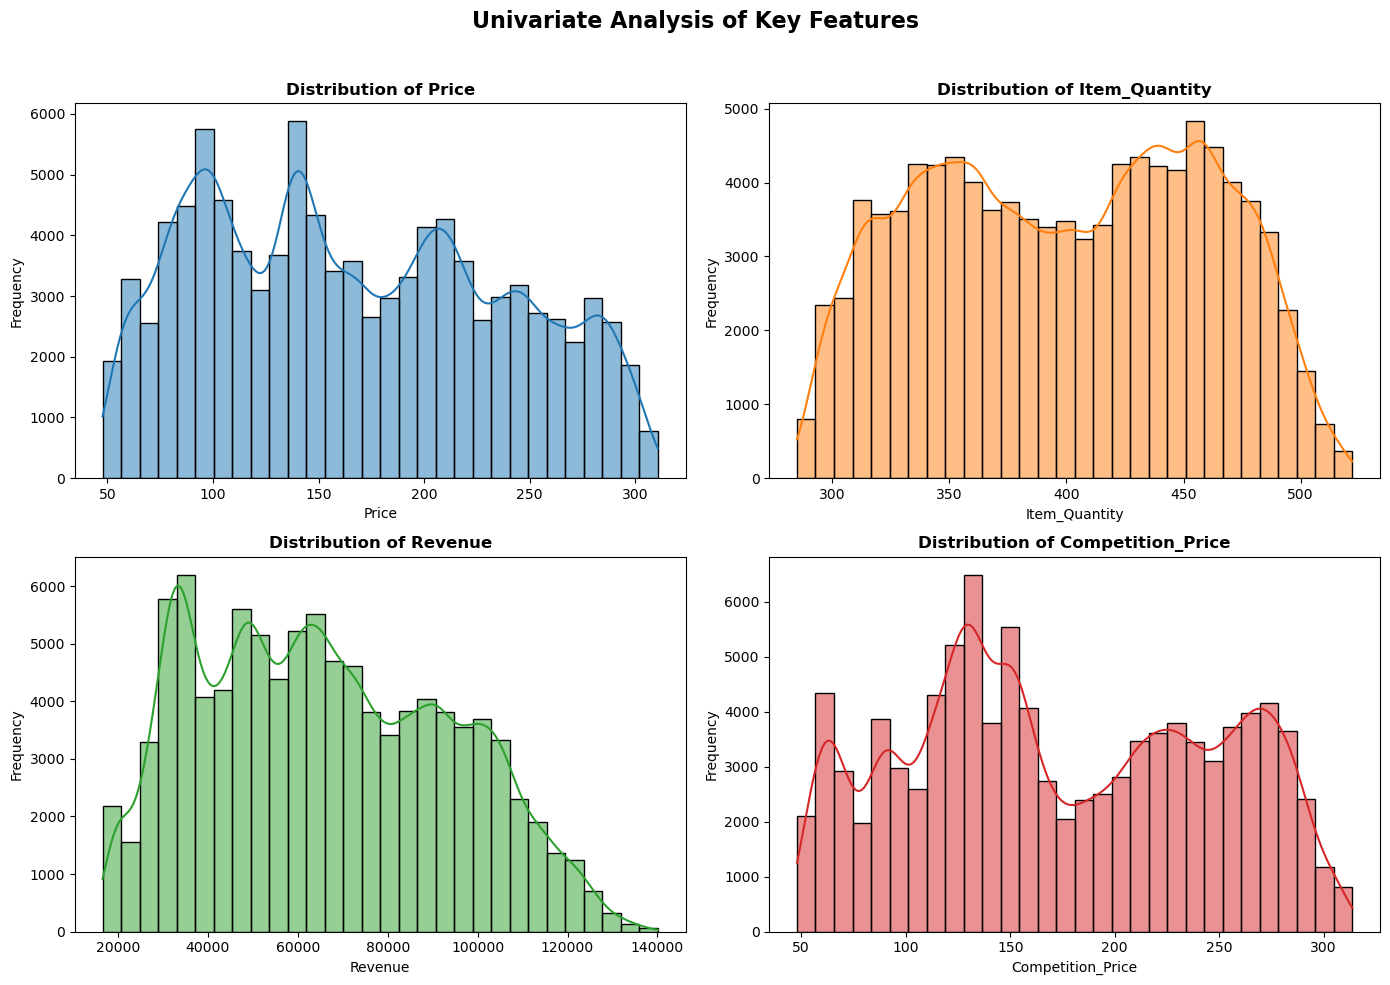

In [15]:
# Setting up subplot grid (2 rows, 2 cols)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Univariate Analysis of Key Features', fontsize=16, fontweight='bold')

# List of columns and colors
cols = ['Price', 'Item_Quantity', 'Revenue', 'Competition_Price']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 

# Looping through columns to plot
for i, col in enumerate(cols):
    row, col_pos = divmod(i, 2)
    sns.histplot(df[col], kde=True, bins=30, ax=axes[row, col_pos], color=colors[i])
    axes[row, col_pos].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<h3 style="color:#DC143C;">🔍 Insights from Univariate Analysis</h3>

<ul>
  <li><b>Price:</b> The distribution of product prices shows multiple peaks, indicating that items are priced in distinct tiers rather than uniformly. This suggests a possible pricing strategy with defined bands.</li>
  
  <li><b>Item Quantity:</b> Demand (item quantity) appears fairly spread, with noticeable clusters around mid-to-high ranges. This implies that while demand varies, many items are consistently sold in moderate to higher quantities.</li>
  
  <li><b>Revenue:</b> Revenue distribution is right-skewed, meaning most transactions generate moderate revenue, while a few outliers contribute significantly higher sales. This aligns with the Pareto principle (few products generating majority of revenue).</li>
  
  <li><b>Competition Price:</b> Competitor prices follow a similar multi-modal pattern as our prices, indicating the market itself has clear pricing tiers. This will be important when analyzing price competitiveness.</li>
</ul>


<h3 style="color:#2f5597;">2. Bivariate Analysis: Price Relationships</h3>
<p><h4>Examine relationships between key pairs of variables to detect trends and associations.</h4></p>

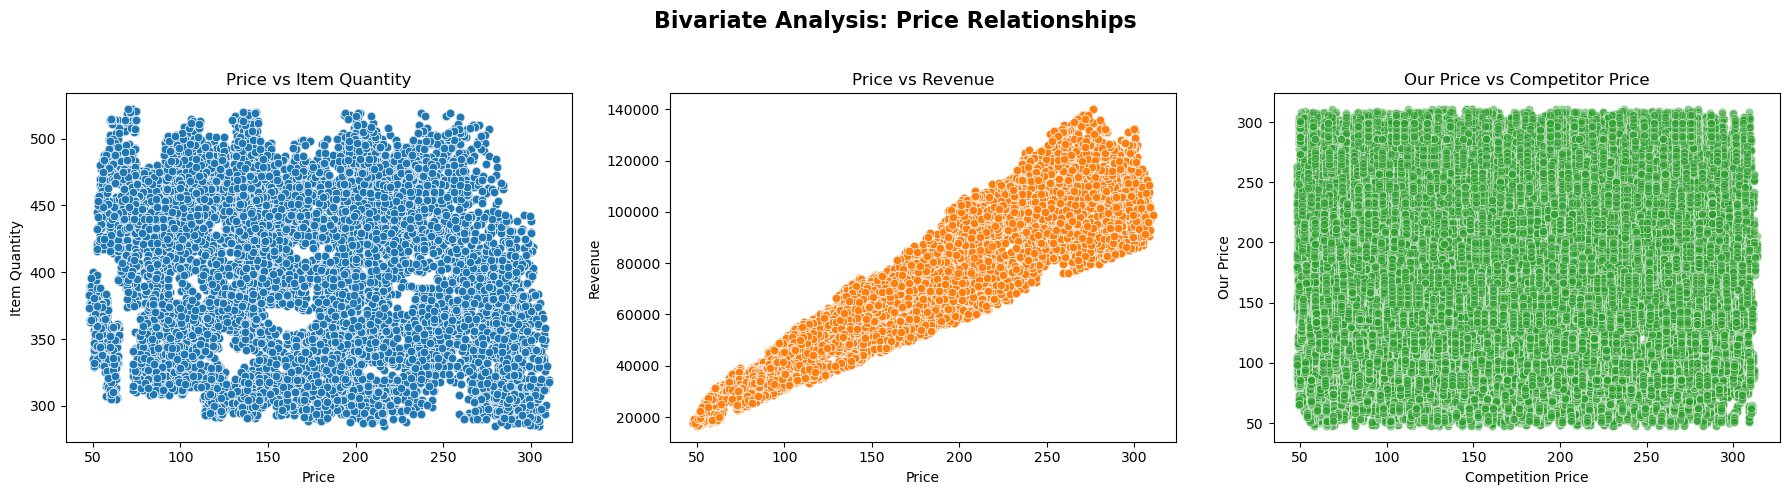

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Bivariate Analysis: Price Relationships', fontsize=16, fontweight='bold')

# Price vs Item Quantity
sns.scatterplot(x='Price', y='Item_Quantity', data=df, alpha=0.5, ax=axes[0], color='#1f77b4')
axes[0].set_title('Price vs Item Quantity')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Item Quantity')

# Price vs Revenue
sns.scatterplot(x='Price', y='Revenue', data=df, alpha=0.5, ax=axes[1], color='#ff7f0e')
axes[1].set_title('Price vs Revenue')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Revenue')

# Price vs Competition Price
sns.scatterplot(x='Competition_Price', y='Price', data=df, alpha=0.5, ax=axes[2], color='#2ca02c')
axes[2].set_title('Our Price vs Competitor Price')
axes[2].set_xlabel('Competition Price')
axes[2].set_ylabel('Our Price')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<h3 style="color:#DC143C;">🔍 Insights from Bivariate Analysis: Price Relationships</h3>

<ul>
  <li><b>Price vs Item Quantity:</b> 
    The scatter plot shows that Item Quantity is relatively spread across all Price levels without a clear downward trend. 
    This suggests that demand is not strongly sensitive to price changes in this dataset, or other factors may be influencing demand.
  </li>

  <li><b>Price vs Revenue:</b> 
    A strong positive relationship is observed between Price and Revenue. As the Price increases, the Revenue generally rises until it reaches higher values, 
    suggesting that revenue peaks at certain price levels. This indicates that optimal pricing can maximize revenue.
  </li>

  <li><b>Our Price vs Competitor Price:</b> 
    The scatter plot indicates that our pricing is widely distributed across the same range as competitor prices. 
    There is no strong deviation, meaning our product pricing strategy is closely aligned with competitors, neither consistently undercutting nor exceeding them.
  </li>
</ul>


<h3 style="color:#2f5597;">3. Time-Based Analysis</h3>
<p><h4>Analyze demand and revenue trends over time to uncover seasonal or periodic patterns.</h4></p>

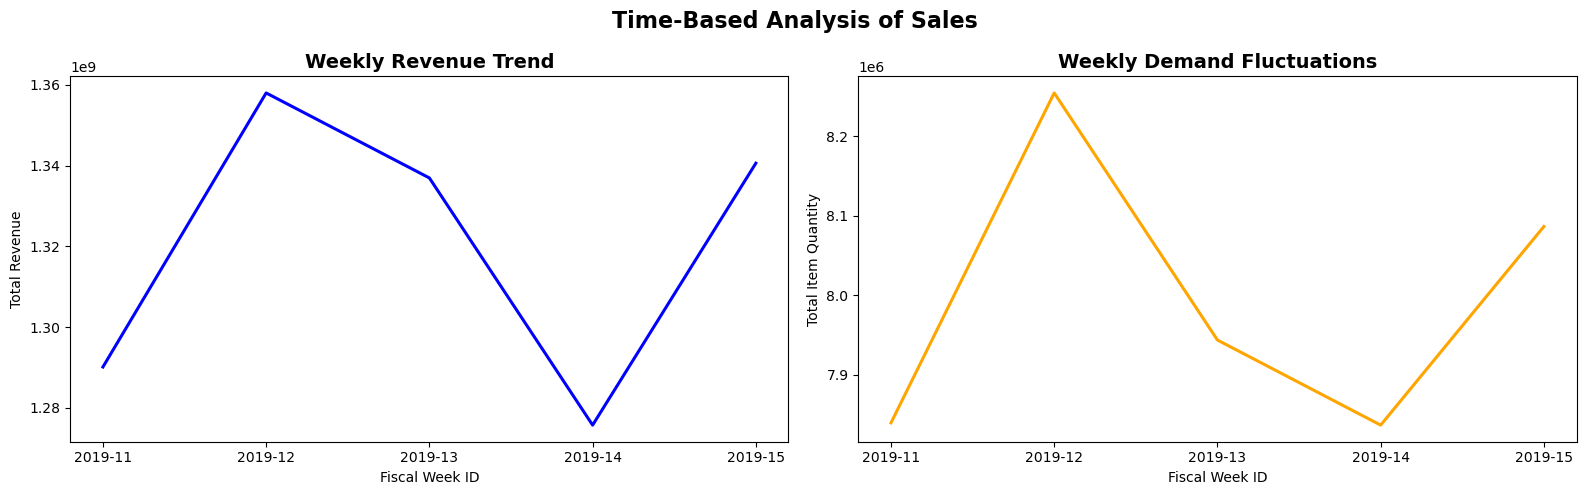

In [17]:
# Grouping data by week
weekly_data = df.groupby("Fiscal_Week_ID").agg({
    "Revenue": "sum",
    "Item_Quantity": "sum"
}).reset_index()

# Plot
plt.figure(figsize=(16,5))

# Subplot 1: Weekly Revenue Trend
plt.subplot(1, 2, 1)
sns.lineplot(data=weekly_data, x="Fiscal_Week_ID", y="Revenue", color="blue", linewidth=2.2)
plt.title("Weekly Revenue Trend", fontsize=14, weight="bold")
plt.xlabel("Fiscal Week ID")
plt.ylabel("Total Revenue")

# Subplot 2: Weekly Demand Fluctuations (Seasonality)
plt.subplot(1, 2, 2)
sns.lineplot(data=weekly_data, x="Fiscal_Week_ID", y="Item_Quantity", color="orange", linewidth=2.2)
plt.title("Weekly Demand Fluctuations", fontsize=14, weight="bold")
plt.xlabel("Fiscal Week ID")
plt.ylabel("Total Item Quantity")

plt.suptitle("Time-Based Analysis of Sales", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Insights from Time-Based Analysis</h3>

<ul>
  <li>Both revenue and demand peak in <b>2019-12</b> and dip in <b>2019-14</b>, showing possible seasonality.</li>
  <li>Revenue and demand trends are closely aligned, confirming sales are <b>volume-driven</b>.</li>
  <li>Replicating conditions of high-performing weeks (e.g., 2019-12) can help sustain growth.</li>
</ul>

<h3 style="color:#2f5597;">4. Store & Item Level Revenue Analysis</h3>
<p><h4>Identify top and bottom performing stores and items to detect segment-level differences.</h4></p>

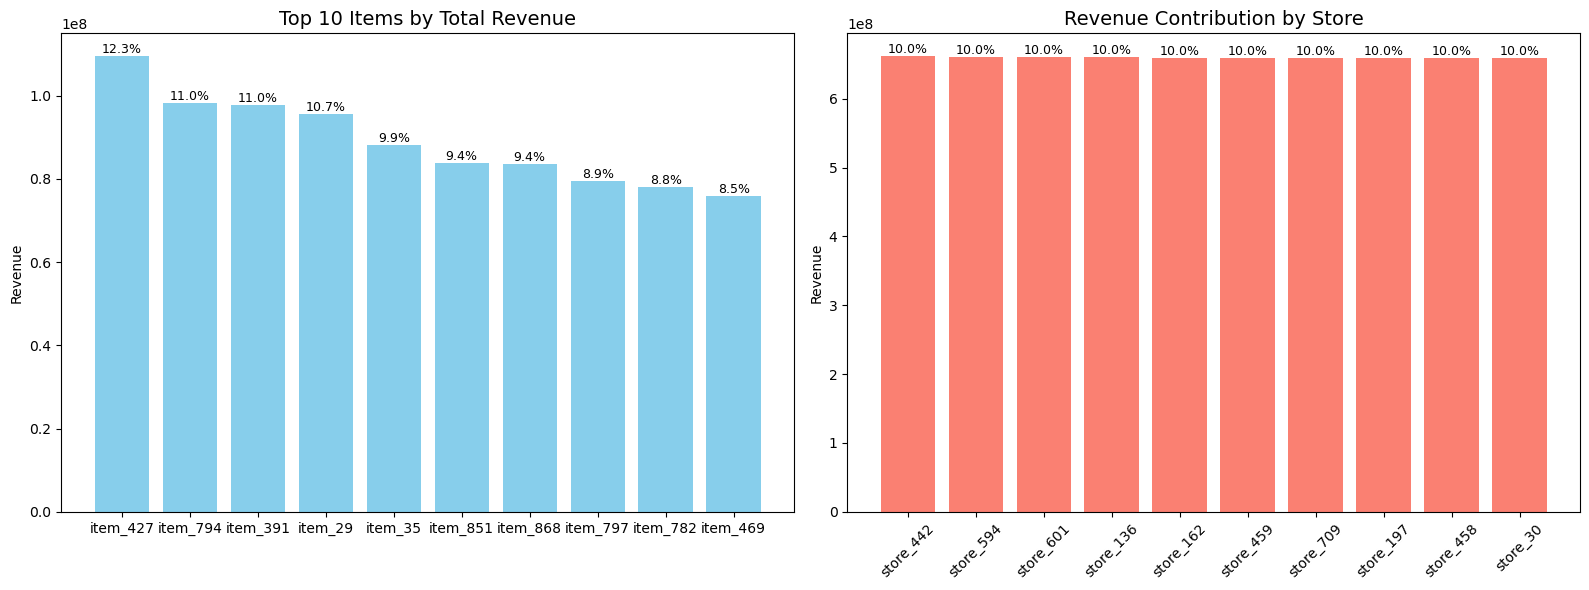

In [18]:
# --- Top 10 Items by Total Revenue ---
item_revenue = df.groupby('Item_ID')['Revenue'].sum().sort_values(ascending=False).head(10)
item_percent = (item_revenue / item_revenue.sum()) * 100  # percentage contribution

# --- Revenue Contribution by Store ---
store_revenue = df.groupby('Store_ID')['Revenue'].sum().sort_values(ascending=False)
store_percent = (store_revenue / store_revenue.sum()) * 100

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 Items
bars1 = axes[0].bar(item_revenue.index.astype(str), item_revenue.values, color='skyblue')
axes[0].set_title('Top 10 Items by Total Revenue', fontsize=14)
axes[0].set_ylabel('Revenue')

# Adding % labels on bars
for bar, pct in zip(bars1, item_percent):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height,
                 f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

# Revenue by Store
bars2 = axes[1].bar(store_revenue.index.astype(str), store_revenue.values, color='salmon')
axes[1].set_title('Revenue Contribution by Store', fontsize=14)
axes[1].set_ylabel('Revenue')
axes[1].tick_params(axis='x', rotation=45)

# Adding % labels on bars
for bar, pct in zip(bars2, store_percent):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height,
                 f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Store & Item Level Revenue Analysis – Insights</h3>

<ul>
  <li>💰 <b>Top 10 Items by Total Revenue:</b> 
    <ul>
      <li>Item_427 stands out as the highest revenue-generating item.</li>
      <li>Other items like Item_794, Item_391, and Item_29 also contribute significantly.</li>
      <li>There is a gradual revenue drop from the top item down to Item_469, indicating a long-tail distribution of item performance.</li>
    </ul>
  </li>

  <li>🏪 <b>Revenue Contribution by Store:</b>
    <ul>
      <li>All stores (Store_442 to Store_30) show very similar total revenue levels.</li>
      <li>This indicates that revenue generation is evenly distributed across stores, with no single store dominating performance.</li>
      <li>Such balance suggests consistent pricing and sales strategies across the store network.</li>
    </ul>
  </li>
</ul>


<h3 style="color:#2f5597;">5. Discount Overview</h3>
<p><h4>Understand overall discount patterns and their general distribution across sales.</h4></p>

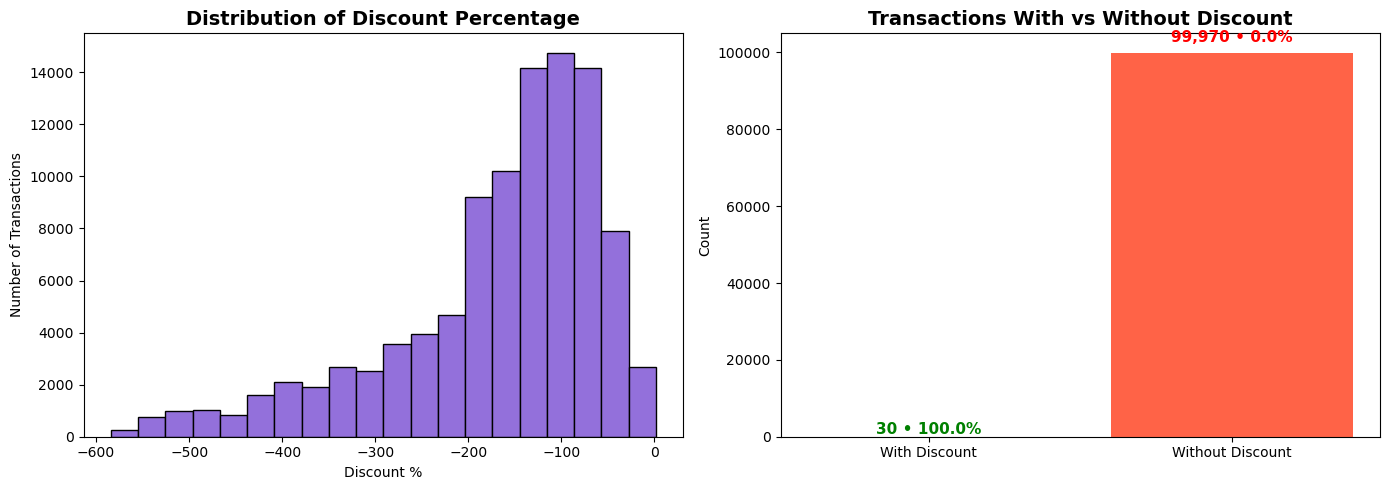

In [19]:
# --- Distribution of Discount_Percentage ---
discounts = df['Discount_Percentage'].dropna()

# --- Count of transactions with and without discounts ---
df['Has_Discount'] = df['Discount_Percentage'] > 0
discount_counts = df['Has_Discount'].value_counts()
total = discount_counts.sum()
percentages = (discount_counts / total) * 100

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Distribution histogram
axes[0].hist(discounts, bins=20, color='mediumpurple', edgecolor='black')
axes[0].set_title('Distribution of Discount Percentage', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Discount %')
axes[0].set_ylabel('Number of Transactions')

# Right: With vs Without discount bar chart
labels = ['With Discount', 'Without Discount']
colors = ['seagreen', 'tomato']
bars = axes[1].bar(labels, [discount_counts[True], discount_counts[False]], color=colors)

axes[1].set_title('Transactions With vs Without Discount', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')

# Adding combined count + percentage labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    pct_color = 'green' if i == 0 else 'red'
    axes[1].text(
        bar.get_x() + bar.get_width()/2, height + (0.02*height),
        f'{height:,} • {percentages[i]:.1f}%',
        ha='center', va='bottom',
        fontsize=11, color=pct_color, fontweight='bold'
    )

plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Discount Overview — Key Insights</h3>

<ul>
  <li><b>Distribution of Discount Percentage:</b> Discounts are highly skewed, with most transactions clustering between <b>-200% to -50%</b> range.</li>
  <li><b>Discount Adoption:</b> Out of ~100K transactions, only <b>30</b> included discounts — indicating <b>~0.03% adoption</b>.</li>
  <li><b>Business Implication:</b> Discounts are <b>rarely used</b> in this dataset, so they are <b>unlikely to drive overall revenue trends</b> and may have minimal effect on demand.</li>
</ul>

<h3 style="color:#2f5597;">6. Competition Overview</h3>
<p><h4>Compare our pricing with competitor pricing to assess market positioning.</h4></p>

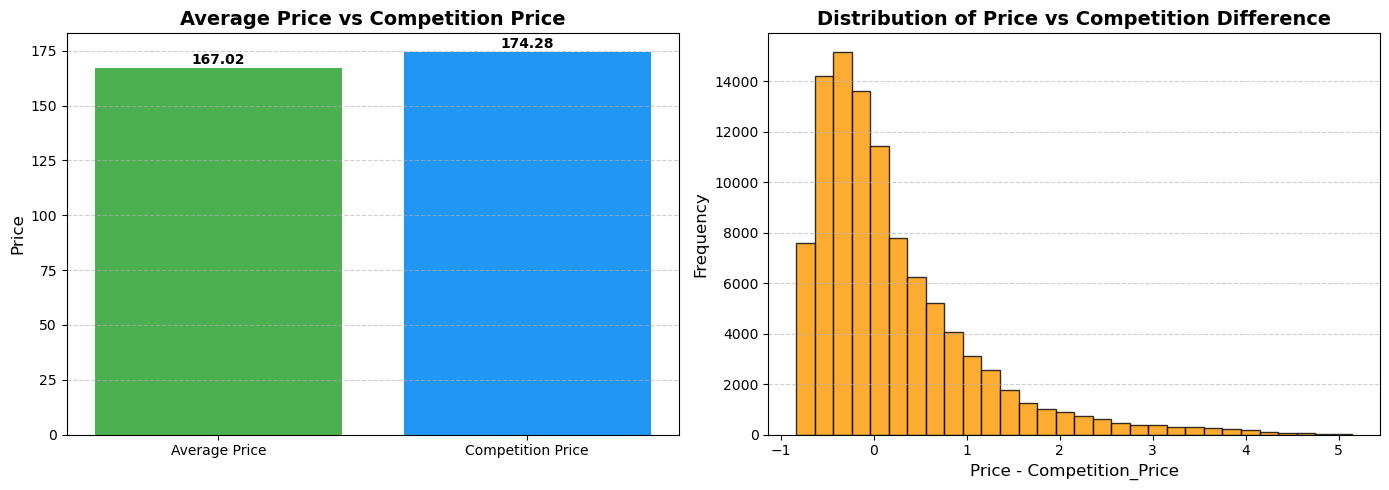

In [20]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Average Price vs Competition Price (Bar chart) ---
avg_price = df['Price'].mean()
avg_comp_price = df['Competition_Price'].mean()

axes[0].bar(['Average Price', 'Competition Price'], [avg_price, avg_comp_price], color=['#4CAF50', '#2196F3'])
axes[0].set_title('Average Price vs Competition Price', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Adding value labels on top of bars
for i, v in enumerate([avg_price, avg_comp_price]):
    axes[0].text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# --- Plot 2: Histogram of Price vs Competition difference ---
axes[1].hist(df['Price_vs_Competition'], bins=30, color='#FF9800', edgecolor='black', alpha=0.8)
axes[1].set_title('Distribution of Price vs Competition Difference', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price - Competition_Price', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Adjusting layout
plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Competition Overview — Key Insights</h3>

<ul>
  <li><b>Average Pricing:</b> Our products are priced at <b>₹167.02</b> on average, slightly <b>below the competition's ₹174.28</b>.</li>
  <li><b>Price Difference Distribution:</b> Most products are priced <b>very close to competitors</b>, with a heavy concentration around <b>0 to +1 difference</b>.</li>
  <li><b>Business Implication:</b> Pricing strategy appears <b>competitive but conservative</b>, staying just below market levels to attract price-sensitive customers.</li>
</ul>

<h2 style="color:#8B0000;">🎯 Part 2: Problem Statement EDA</h2>

<div style="background-color: #eef6f5; padding: 20px; border-radius: 8px; max-width: 1200px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #264653; line-height: 1.6;">

<h2 style="color:#4B0082; font-weight:bold; margin-top:0;">Problem Statement</h2>

<p><strong>"What is the optimal price point that maximizes revenue while maintaining demand in a competitive market?"</strong></p>
</div>

<h3 style="color:#2f5597;">1. Price vs Demand</h3>
<p><h4>Understand how demand (item quantity) changes with price levels.</h4></p>

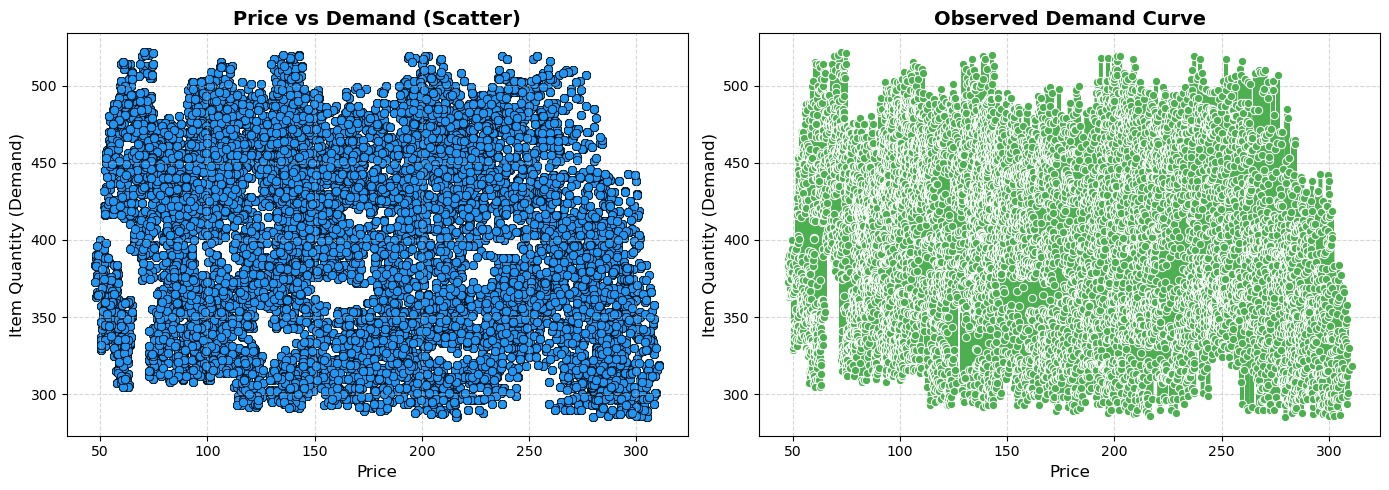

In [21]:
# Sorting by Price for a smoother demand curve
df_sorted = df.sort_values('Price')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Scatter plot of Price vs Item_Quantity ---
sns.scatterplot(
    data=df, 
    x='Price', 
    y='Item_Quantity', 
    ax=axes[0],
    color='#2196F3', 
    alpha=0.7, 
    edgecolor='black'
)
axes[0].set_title('Price vs Demand (Scatter)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price', fontsize=12)
axes[0].set_ylabel('Item Quantity (Demand)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# --- Plot 2: Line plot showing demand curve ---
sns.lineplot(
    data=df_sorted, 
    x='Price', 
    y='Item_Quantity', 
    ax=axes[1],
    color='#4CAF50', 
    linewidth=2.5, 
    marker='o'
)
axes[1].set_title('Observed Demand Curve', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price', fontsize=12)
axes[1].set_ylabel('Item Quantity (Demand)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Adjusting layout
plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Price vs Demand — Key Insights</h3>

<ul>
  <li><b>No clear demand curve shape:</b> The scatter shows <b>no strong negative relationship</b> between price and demand (item quantity).</li>
  <li><b>Demand remains fairly stable</b> across the entire price range, indicating <b>low price sensitivity</b> in this market.</li>
  <li><b>Business implication:</b> Price adjustments may <b>not significantly impact demand</b>, allowing flexibility in pricing strategies.</li>
</ul>

<h3 style="color:#2f5597;">2. Price vs Revenue</h3>
<p><h4>Determine how revenue responds to different price points and find the peak revenue price.</h4></p>

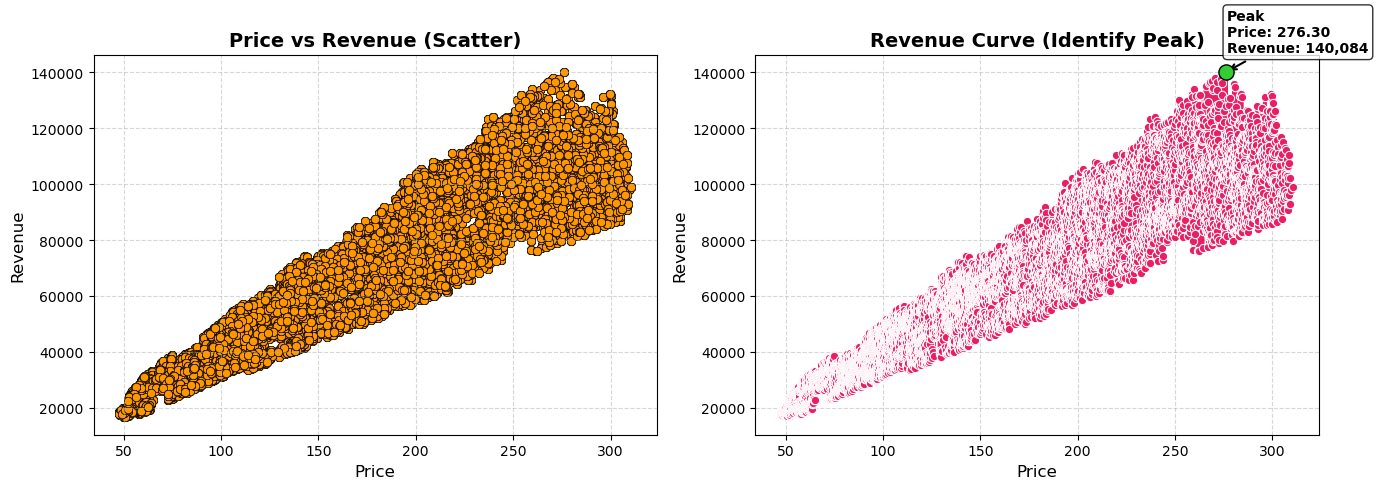

In [22]:
# Identifying peak revenue point
peak_idx = df_sorted['Revenue'].idxmax()
peak_price = df_sorted.loc[peak_idx, 'Price']
peak_revenue = df_sorted.loc[peak_idx, 'Revenue']

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Scatter plot ---
sns.scatterplot(
    data=df, 
    x='Price', 
    y='Revenue', 
    ax=axes[0],
    color='#FF9800',
    alpha=0.7, 
    edgecolor='black'
)
axes[0].set_title('Price vs Revenue (Scatter)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price', fontsize=12)
axes[0].set_ylabel('Revenue', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# --- Plot 2: Line plot with peak annotation ---
sns.lineplot(
    data=df_sorted, 
    x='Price', 
    y='Revenue', 
    ax=axes[1],
    color='#E91E63',
    linewidth=2.5, 
    marker='o'
)

# Highlighting the peak point
axes[1].scatter(peak_price, peak_revenue, color='limegreen', s=120, edgecolor='black', zorder=5)
axes[1].annotate(
    f'Peak\nPrice: {peak_price:.2f}\nRevenue: {peak_revenue:,.0f}',
    xy=(peak_price, peak_revenue),
    xytext=(peak_price+0.5, peak_revenue*1.05),
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.8),
    fontsize=10,
    fontweight='bold'
)

axes[1].set_title('Revenue Curve (Identify Peak)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price', fontsize=12)
axes[1].set_ylabel('Revenue', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Adjusting layout
plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Price vs Revenue — Key Insights</h3>

<ul>
  <li><b>Positive relationship:</b> Revenue increases with price up to a certain point, showing a strong upward trend initially.</li>
  <li><b>Revenue peaks at Price ≈ 276.30</b> with <b>Revenue ≈ 140,084</b>, after which higher prices do not increase revenue further.</li>
  <li><b>Business implication:</b> This peak marks a <b>potential optimal price zone</b> to maximize revenue.</li>
</ul>


<h3 style="color:#2f5597;">3. Impact of Discounts — Demand & Revenue Response</h3>
<p><h4>Evaluate how different discount levels influence both demand and revenue generation.</h4></p>

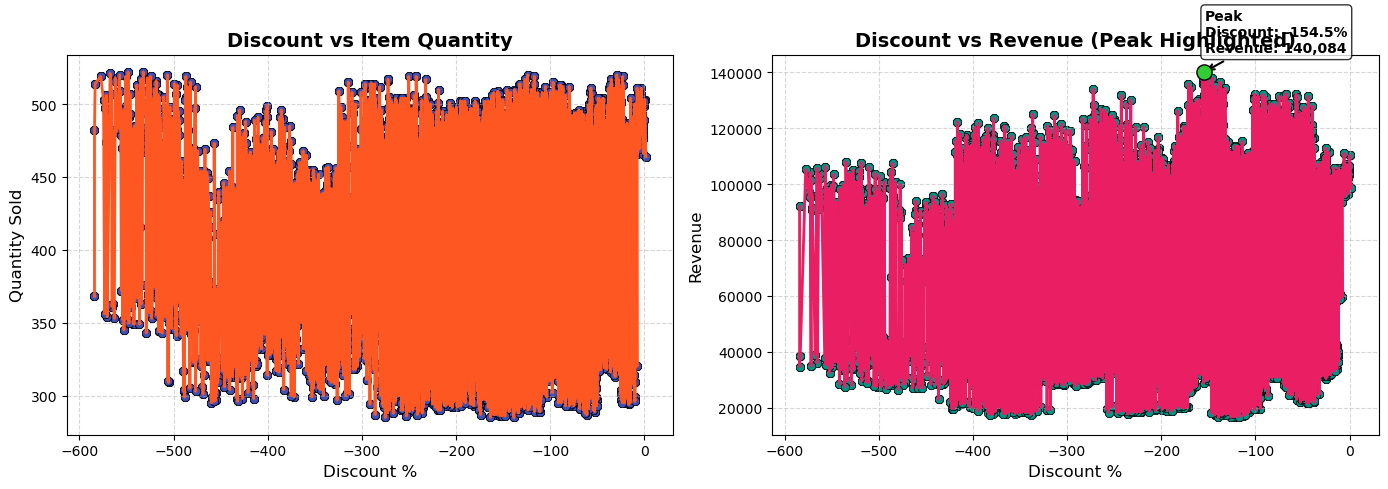

In [23]:
# Sorting by Discount_Percentage for smooth line plots
df_sorted = df.sort_values('Discount_Percentage')

# Finding peak revenue point
peak_idx = df_sorted['Revenue'].idxmax()
peak_discount = df_sorted.loc[peak_idx, 'Discount_Percentage']
peak_revenue = df_sorted.loc[peak_idx, 'Revenue']

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Discount vs Item_Quantity ---
sns.scatterplot(
    data=df, 
    x='Discount_Percentage', 
    y='Item_Quantity', 
    ax=axes[0],
    color='#3F51B5', 
    alpha=0.6, 
    edgecolor='black'
)
sns.lineplot(
    data=df_sorted,
    x='Discount_Percentage',
    y='Item_Quantity',
    ax=axes[0],
    color='#FF5722',
    linewidth=2
)
axes[0].set_title('Discount vs Item Quantity', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Discount %', fontsize=12)
axes[0].set_ylabel('Quantity Sold', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# --- Plot 2: Discount vs Revenue (Highlight Peak) ---
sns.scatterplot(
    data=df, 
    x='Discount_Percentage', 
    y='Revenue', 
    ax=axes[1],
    color='#009688', 
    alpha=0.6, 
    edgecolor='black'
)
sns.lineplot(
    data=df_sorted,
    x='Discount_Percentage',
    y='Revenue',
    ax=axes[1],
    color='#E91E63',
    linewidth=2
)

# Highlighting the peak revenue point
axes[1].scatter(peak_discount, peak_revenue, color='limegreen', s=120, edgecolor='black', zorder=5)
axes[1].annotate(
    f'Peak\nDiscount: {peak_discount:.1f}%\nRevenue: {peak_revenue:,.0f}',
    xy=(peak_discount, peak_revenue),
    xytext=(peak_discount+1, peak_revenue*1.05),
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.8),
    fontsize=10,
    fontweight='bold'
)

axes[1].set_title('Discount vs Revenue (Peak Highlighted)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Discount %', fontsize=12)
axes[1].set_ylabel('Revenue', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Insights from Discount Analysis</h3>

<h4>Discount vs Item Quantity</h4>
<ul>
  <li>The quantity sold remains relatively stable between <strong>300 and 520 units</strong> across all discount percentages.</li>
  <li>There is <strong>no clear upward or downward trend</strong> in quantity with increasing discount, suggesting that <strong>discounts do not significantly impact the number of items sold</strong>.</li>
  <li>Some fluctuations are visible but are scattered and not concentrated at specific discount levels.</li>
</ul>

<h4>Discount vs Revenue</h4>
<ul>
  <li>Revenue fluctuates between <strong>₹20,000 and ₹140,000</strong> across the range of discount percentages.</li>
  <li>A <strong>peak revenue of ₹140,084</strong> is observed at around <strong>-154.5% discount</strong>.</li>
  <li>Revenue is <strong>not directly proportional to discount</strong>; high revenue points appear scattered, indicating other influencing factors like base price or quantity sold.</li>
  <li>Extremely high negative discounts (>-500%) exist, which may indicate <strong>data entry errors or outliers</strong> needing further investigation.</li>
</ul>

<h4>📌 Summary</h4>
<ul>
  <li>Discounts have <strong>little to no correlation with quantity sold</strong>.</li>
  <li>Revenue shows <strong>sporadic peaks</strong> and does not follow a consistent pattern with discounts.</li>
  <li>Data cleaning might be needed to handle <strong>extreme negative discount outliers</strong>.</li>
</ul>


<h3 style="color:#2f5597;">4. Competition Effect — Pricing Position vs Demand</h3>
<p></h4>Analyze how being priced above or below competitors impacts demand and earnings.</h4></p>

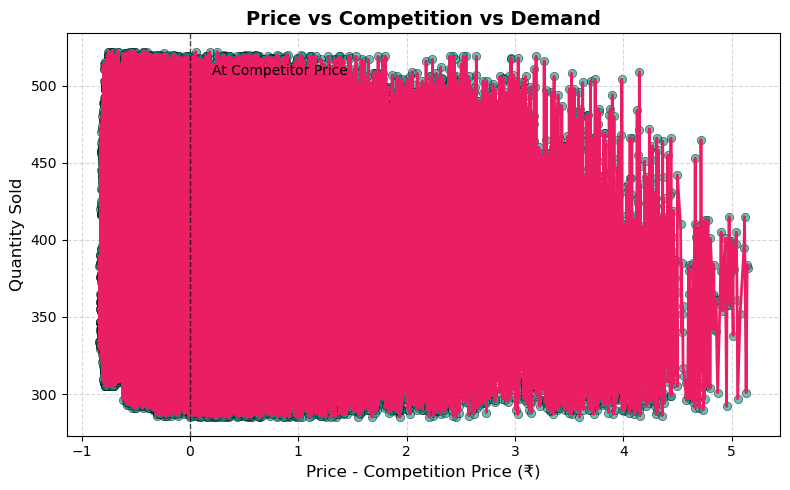

In [24]:
# Sort by difference for smooth trend line
df_sorted = df.sort_values('Price_vs_Competition')

# Create subplot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Scatter plot with line to see trend
sns.scatterplot(
    data=df, 
    x='Price_vs_Competition', 
    y='Item_Quantity',
    ax=ax,
    color='#009688',
    alpha=0.6,
    edgecolor='black'
)
sns.lineplot(
    data=df_sorted,
    x='Price_vs_Competition',
    y='Item_Quantity',
    ax=ax,
    color='#E91E63',
    linewidth=2
)

ax.axvline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
ax.text(0.2, ax.get_ylim()[1]*0.95, 'At Competitor Price', color='black', fontsize=10)

ax.set_title('Price vs Competition vs Demand', fontsize=14, fontweight='bold')
ax.set_xlabel('Price - Competition Price (₹)', fontsize=12)
ax.set_ylabel('Quantity Sold', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Insights from Price vs Competition vs Demand Analysis</h3>

<h4>Pricing Relative to Competitors</h4>
<ul>
  <li>The x-axis represents <strong>Price - Competition Price</strong>, with <strong>0 indicating parity with competitors</strong>.</li>
  <li>Most products are <strong>clustered near and above the competitor price</strong>, with prices extending up to ₹5 higher than the competition.</li>
  <li>There are also instances where prices are slightly below competitor prices (negative values).</li>
</ul>

<h4>Impact on Demand (Quantity Sold)</h4>
<ul>
  <li>Quantity sold mostly stays between <strong>300 and 520 units</strong> regardless of the pricing difference.</li>
  <li>There is <strong>no sharp drop in quantity</strong> even when prices are set higher than competitors.</li>
  <li>This suggests that <strong>demand is relatively inelastic</strong> to small price differences from competitors.</li>
</ul>

<h4>📌 Summary</h4>
<ul>
  <li>Being priced slightly above competitors does <strong>not significantly reduce demand</strong>.</li>
  <li>Demand remains <strong>stable across a wide price range</strong>, indicating possible <strong>strong brand loyalty or low price sensitivity</strong>.</li>
  <li>The <strong>dotted vertical line at 0</strong> helps visually compare performance at parity pricing vs above-competition pricing.</li>
</ul>


<h3 style="color:#2f5597;">5. Segmented Analysis</h3>
<p><h4>Assess store-level and item-level demand vs price to see if optimal pricing varies by segment.</h4></p>

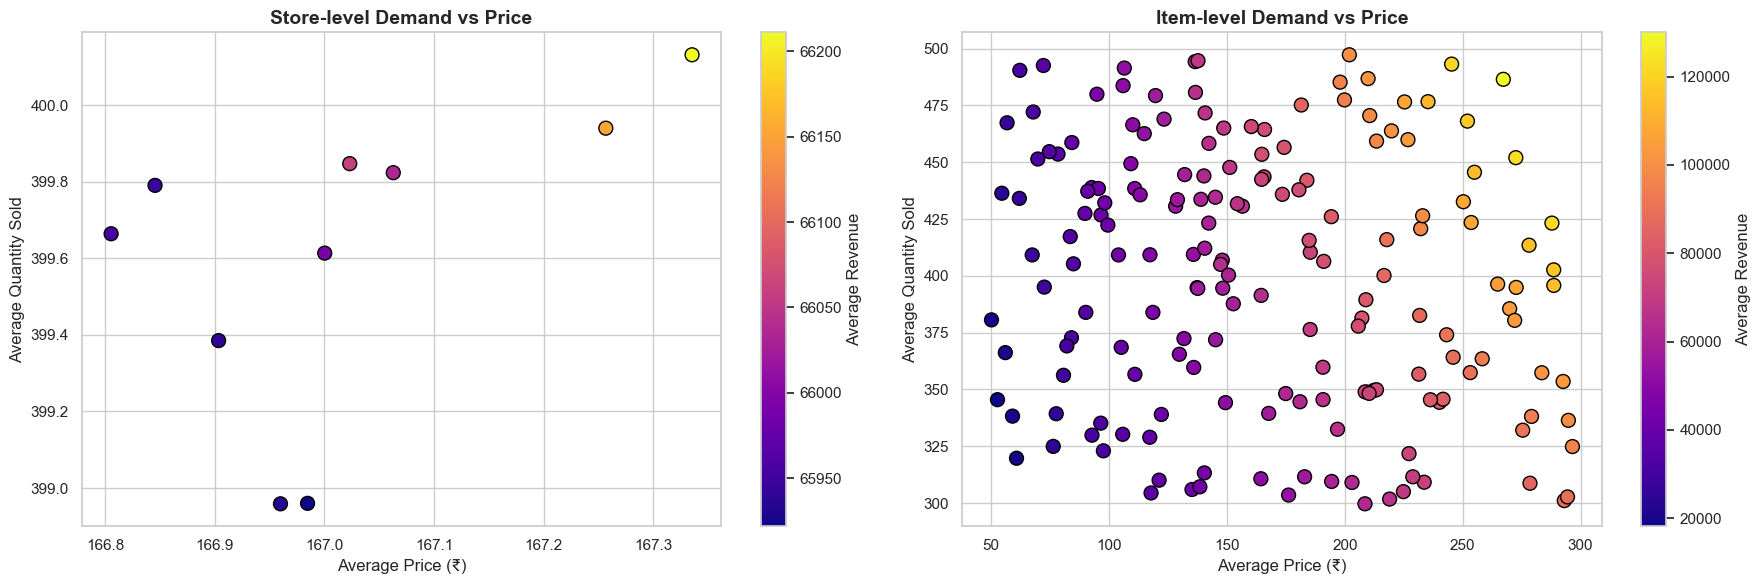

In [25]:
# Setting style
sns.set(style="whitegrid")

# Creating figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ---------- Store-level Demand vs Price ----------
store_avg = df.groupby('Store_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'mean',
    'Revenue': 'mean'
}).reset_index()

sc1 = axes[0].scatter(
    store_avg['Price'],
    store_avg['Item_Quantity'],
    c=store_avg['Revenue'],
    cmap='plasma',
    edgecolor='black',
    s=100
)
axes[0].set_title('Store-level Demand vs Price', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Average Price (₹)')
axes[0].set_ylabel('Average Quantity Sold')
cbar1 = fig.colorbar(sc1, ax=axes[0])
cbar1.set_label('Average Revenue')

# ---------- Item-level Demand vs Price ----------
item_avg = df.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'mean',
    'Revenue': 'mean'
}).reset_index()

sc2 = axes[1].scatter(
    item_avg['Price'],
    item_avg['Item_Quantity'],
    c=item_avg['Revenue'],
    cmap='plasma',
    edgecolor='black',
    s=100
)
axes[1].set_title('Item-level Demand vs Price', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average Price (₹)')
axes[1].set_ylabel('Average Quantity Sold')
cbar2 = fig.colorbar(sc2, ax=axes[1])
cbar2.set_label('Average Revenue')

plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Insights from Segmented Analysis</h3>

<h4>🏪 Store-level Demand vs Price</h4>
<ul>
  <li>The average <strong>price variation across stores is minimal</strong> (≈ ₹166.8–₹167.3).</li>
  <li>Average quantity sold remains nearly constant (~399–400 units), showing <strong>no strong relationship</strong> between price and quantity at the store level.</li>
  <li>Average revenue differences are small, indicating that <strong>store-level pricing has little impact</strong> on demand or revenue within this narrow price band.</li>
</ul>

<h4>🛒 Item-level Demand vs Price</h4>
<ul>
  <li>There is <strong>wide variation in prices</strong> across items (≈ ₹50–₹300).</li>
  <li>Quantity sold tends to <strong>decrease slightly at higher prices</strong>, suggesting a negative price–demand relationship for some items.</li>
  <li>Revenue increases for many mid- to high-priced items (warmer colors), indicating that <strong>higher-priced items can still generate higher revenue</strong> despite lower volumes.</li>
  <li>This pattern suggests value/positioning differences across items—some products sustain higher prices without large drops in demand.</li>
</ul>

<h4>🔗 Conclusion</h4>
<p>
Overall, <strong>store-level</strong> effects are muted (prices and demand are stable across stores), while <strong>item-level</strong> analysis shows meaningful variation — reinforcing the need for <strong>item-level elasticity modeling and segmented pricing</strong> to find revenue-optimal prices.
</p>


<div style="background-color:#f0f4f8; padding:15px; border-radius:10px;">
<h2 style="color:#2E86AB">📋 EDA Summary — Price Optimization Project</h2>

<p>
This EDA explored dataset quality, overall patterns, and targeted analyses aligned with the problem: 
<strong>“What price maximizes revenue while maintaining demand in a competitive market?”</strong>
</p>

<h3 style="color:#8B0000;">✅ Key Findings (Basic EDA)</h3>
<ul>
  <li><strong>Data quality:</strong> Dataset is clean — no missing values, no duplicates, and no major outliers after checks.</li>
  <li><strong>Distributions:</strong> Prices and competitor prices show multi-modal/tiered patterns; revenue is right-skewed (few transactions drive high revenue).</li>
  <li><strong>Time trends:</strong> Revenue and demand peak in <em>2019-12</em> and dip in <em>2019-14</em>, indicating short-term seasonality or external events.</li>
  <li><strong>Store & item behavior:</strong> Revenue is relatively evenly distributed across stores; a small set of items (e.g., top 10) contribute most revenue (long-tail behavior).</li>
  <li><strong>Discounts:</strong> Discounts are rare and show little consistent effect on demand across the dataset.</li>
  <li><strong>Competition:</strong> Our average price (~₹167) is slightly below competitors (~₹174); most price differences cluster near parity.</li>
</ul>

<h3 style="color:#8B0000;"">🔍 Problem-Driven EDA Insights</h3>
<ul>
  <li><strong>Price vs Demand:</strong> No strong negative relationship observed — demand appears relatively inelastic overall (quantity fairly stable across price ranges).</li>
  <li><strong>Price vs Revenue:</strong> Revenue rises with price up to a peak (observed peak ~<em>Price ≈ 276.3</em>, Revenue ≈ <em>140,084</em>), suggesting a potential optimal price zone to maximize revenue.</li>
  <li><strong>Impact of discounts:</strong> Discounting does not consistently increase revenue — some high-revenue points occur at unusual discount levels, requiring further investigation for data anomalies or contextual drivers.</li>
  <li><strong>Competition effect:</strong> Being slightly above competitor price does not cause a sharp drop in demand — small price premiums may be sustainable in many segments.</li>
  <li><strong>Segmentation:</strong> Optimal pricing likely varies by item (and possibly store); segmented analysis shows different demand–price slopes across items/stores.
  </li>
</ul>

<h3 style="color:#6A1B9A">📈 Recommended Next Steps (Modeling & Business Tests)</h3>
<ol>
  <li><strong>Estimate price elasticity</strong> (log-log regression) overall and by segment (item & store) to quantify sensitivity.</li>
  <li><strong>Run revenue simulations</strong> across price grids using predicted demand to find revenue-maximizing prices per segment.</li>
  <li><strong>Design A/B test simulations</strong> (or recommend real A/B experiments) for promising price changes to validate causal effects on demand & revenue.</li>
  <li><strong>Investigate anomalies</strong> (extreme negative discounts or outlier revenue points) and clean/flag data if necessary before final recommendations.</li>
  <li><strong>Build an interactive dashboard</strong> (Power BI / Excel) with price sliders, segment filters, and KPI cards (Predicted Revenue, Elasticity, Uplift %).</li>
</ol>

<p style="font-style:italic;color:gray">
Overall: the EDA provides a strong, business-focused foundation — the data supports moving quickly into elasticity modeling and revenue-optimization simulations, with segmented strategies likely to yield the best results.
</p>


<div id="elasticity"></div>

<div style="background: linear-gradient(135deg, #FBC2EB, #A6C1EE); padding:25px; border-radius:15px; box-shadow:0 3px 8px rgba(0,0,0,0.1);">
  <h1 style="text-align:center; color:#663399; font-size:30px;">💸 Price Elasticity Modeling</h1>
  <p style="text-align:center; color:#663399; font-size:15px;">Measuring how demand responds to price changes</p>
</div>

<h3 style="color:#2f5597;">Log-Log Regression with Elasticity Extraction</h3>

In [26]:
import statsmodels.formula.api as smf

# Filtering for positive values (required for log transformation)
df_log = df[(df['Price'] > 0) & (df['Item_Quantity'] > 0)].copy()

# Creating log columns
df_log['ln_Price'] = np.log(df_log['Price'])
df_log['ln_Quantity'] = np.log(df_log['Item_Quantity'])

# Optional controls
controls = ['Discount_Percentage', 'Competition_Price']
control_str = ' + '.join(controls) if controls else ''

# Building log-log model
formula_log = f'ln_Quantity ~ ln_Price{" + " + control_str if control_str else ""}'
log_model = smf.ols(formula=formula_log, data=df_log).fit()

# Printing model summary
print(log_model.summary())

# --- 📌 Extract Elasticity ---
elasticity = log_model.params['ln_Price']

print("="*60)
print(f"📊 Estimated Price Elasticity of Demand (PED): {elasticity:.3f}")

if abs(elasticity) > 1:
    print("➡ Demand is ELASTIC — customers are price-sensitive")
    print("💡 Strategy: Lowering price may increase revenue (volume gain > price loss)")
else:
    print("➡ Demand is INELASTIC — customers are less price-sensitive")
    print("💡 Strategy: Slightly raising price may increase revenue (price gain > volume loss)")
print("="*60)

                            OLS Regression Results                            
Dep. Variable:            ln_Quantity   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     832.7
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:10:43   Log-Likelihood:                 48054.
No. Observations:              100000   AIC:                        -9.610e+04
Df Residuals:                   99996   BIC:                        -9.606e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.2451    

<h3 style="color:#2f5597;">Visualizing Log-Log Regression (Elasticity Line)</h3>

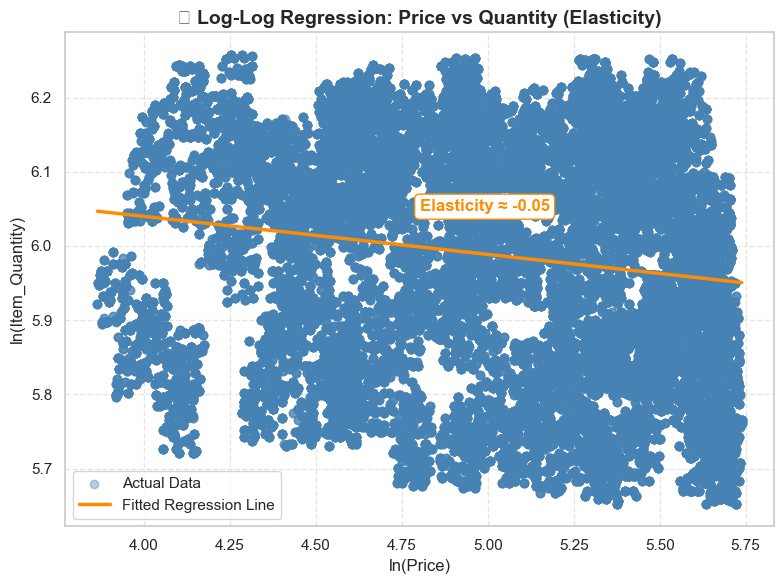

In [27]:
# Getting slope (elasticity) and intercept from the model
slope = log_model.params['ln_Price']
intercept = log_model.params['Intercept']

# Generating predicted line values
x_vals = np.linspace(df_log['ln_Price'].min(), df_log['ln_Price'].max(), 100)
y_vals = intercept + slope * x_vals

# Plot
plt.figure(figsize=(8,6))
plt.scatter(df_log['ln_Price'], df_log['ln_Quantity'], alpha=0.4, color='steelblue', label='Actual Data')
plt.plot(x_vals, y_vals, color='darkorange', linewidth=2.5, label='Fitted Regression Line')

# Labels & styling
plt.title('📉 Log-Log Regression: Price vs Quantity (Elasticity)', fontsize=14, fontweight='bold')
plt.xlabel('ln(Price)', fontsize=12)
plt.ylabel('ln(Item_Quantity)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate slope (elasticity)
plt.text(x_vals.mean(), y_vals.max(), f"Elasticity ≈ {slope:.2f}", 
         fontsize=12, color='darkorange', fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='darkorange', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

<hr style="border: 2px solid #4CAF50;">

<h2 style="color:#4CAF50;">📌 Model Interpretation & Business Insights</h2>

<p>
This section explains the meaning of the estimated Price Elasticity of Demand (PED) derived from the log-log regression model.
</p>

<hr style="border: 1px solid #ddd;">

<h3 style="color:#2196F3;">📐 Model Interpretation</h3>

<ul>
  <li>Estimated Price Elasticity of Demand (PED): <b style="color:#E91E63;">-0.051</b></li>
  <li>R-squared: <b>0.024</b> — The model explains a small portion of the variance in demand, indicating weak price sensitivity.</li>
  <li>Significance: The coefficient for <code>ln_Price</code> is statistically significant (p &lt; 0.001).</li>
  <li>The elasticity value is <b>negative</b> as expected (price ↑ leads to demand ↓), but very close to zero.</li>
</ul>

<p style="background-color:#f1f8e9; padding:10px; border-left:5px solid #8bc34a;">
🔍 <b>Interpretation:</b> Demand is <b>highly inelastic</b> — A 1% increase in price causes only about a 0.05% drop in quantity demanded.
</p>

<hr style="border: 1px solid #ddd;">

<h3 style="color:#FF9800;">💡 Business Insights</h3>

<ul>
  <li>Since demand is inelastic, customers are relatively <b>less sensitive</b> to price changes.</li>
  <li><b>Increasing price</b> slightly could raise revenue because the loss in quantity sold will be minimal.</li>
  <li>Discounts have a small positive impact on demand, but are <b>not essential</b> to drive sales volume.</li>
  <li>Competitor price currently shows <b>no significant effect</b> on demand.</li>
</ul>

<p style="background-color:#fff3e0; padding:10px; border-left:5px solid #ff9800;">
💼 <b>Strategic Implication:</b> Focus on <b>maintaining higher price points</b> and <b>minimizing unnecessary discounts</b> to maximize revenue without harming demand.
</p>

<hr style="border: 2px solid #4CAF50;">


<div id="revenue"></div>

<div style="background: linear-gradient(135deg, #FFD3B6, #FFAAA5); padding:25px; border-radius:15px; box-shadow:0 3px 8px rgba(0,0,0,0.1);">
  <h1 style="text-align:center; color:#C44536; font-size:30px;">💰 Revenue Optimization</h1>
  <p style="text-align:center; color:#C44536; font-size:15px;">Finding the price point that maximizes revenue</p>
</div>

<h3 style="color:#2f5597;">Demand Prediction</h3>
<p><h4>Predict expected quantity sold across a range of price points using the elasticity model.</h4></p>

In [31]:
# Step 1 — Simulating quantity using elasticity
# --------------------------------------------
# Known elasticity from our regression output
elasticity = -0.051

# Creating a realistic price range across your data
price_range = np.linspace(df['Price'].min(), df['Price'].max(), 100)

# Using the average observed quantity as baseline
baseline_price = df['Price'].mean()
baseline_quantity = df['Item_Quantity'].mean()

# Elasticity formula: %ΔQ = elasticity × %ΔP  -->  Q = Q0 * (P/P0)^elasticity
predicted_quantity = baseline_quantity * (price_range / baseline_price) ** elasticity

# Step 2 — Calculating revenue at each price
# --------------------------------------------
revenue = price_range * predicted_quantity

# Combining into a DataFrame
rev_df = pd.DataFrame({
    'Price': price_range,
    'Predicted_Quantity': predicted_quantity,
    'Revenue': revenue
})

# Finding optimal price point
optimal_idx = rev_df['Revenue'].idxmax()
optimal_price = rev_df.loc[optimal_idx, 'Price']
optimal_revenue = rev_df.loc[optimal_idx, 'Revenue']

print(f"💰 Optimal Price: {optimal_price:.2f}")
print(f"📊 Maximum Revenue: {optimal_revenue:,.2f}")

# Showing top 5 rows
print(rev_df.head())

rev_df.to_csv('../data/revenue_optimization_results.csv', index=False)

💰 Optimal Price: 310.66
📊 Maximum Revenue: 120,275.58
       Price  Predicted_Quantity       Revenue
0  47.700000          425.984938  20319.481529
1  50.356162          424.809282  21391.764842
2  53.012323          423.697071  22461.166088
3  55.668485          422.641950  23527.836974
4  58.324646          421.638464  24591.914359


<h3 style="color:#DC143C;">🔍 Insights</h3>

<ul>
  <li>As price increases from <b>₹47.7</b> to <b>₹58.32</b>, the predicted quantity sold shows only a slight decrease 
      (from <b>425.98</b> to <b>421.64</b> units).</li>
  <li>This indicates that demand is relatively <b>inelastic</b> within this price range — customers are not highly sensitive to price changes.</li>
  <li>Despite falling quantity, <b>revenue increases steadily</b> from <b>₹20,319</b> to <b>₹24,591</b> as price rises.</li>
  <li>This pattern suggests there is potential to <b>increase prices further</b> without significantly reducing sales volume.</li>
</ul>

<h3 style="color:#2f5597;">Visualizing Price vs Revenue Curve</h3>

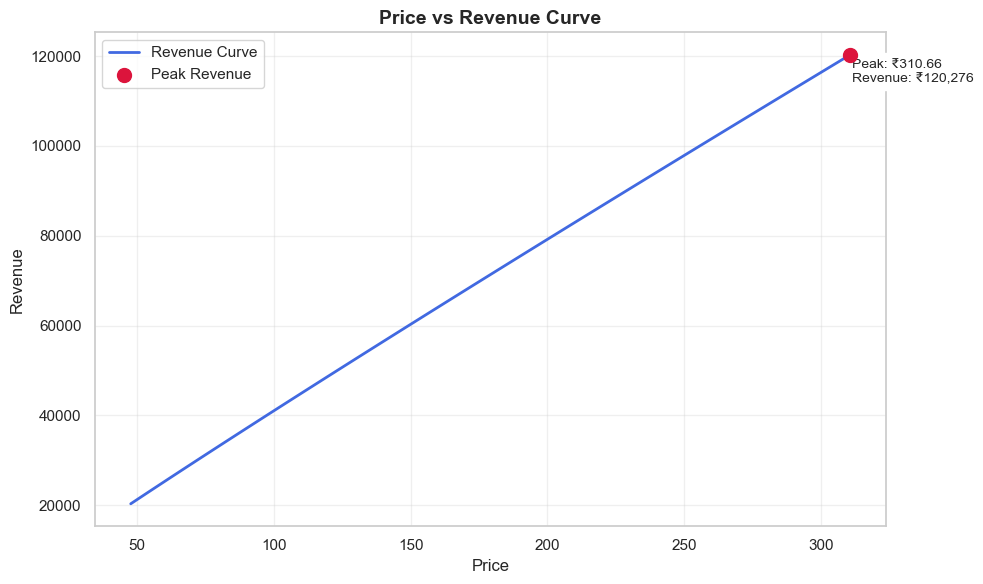

In [32]:
# Identifing the price point where revenue is maximized
max_idx = rev_df['Revenue'].idxmax()
max_price = rev_df.loc[max_idx, 'Price']
max_revenue = rev_df.loc[max_idx, 'Revenue']

# Plotting
plt.figure(figsize=(10,6))
plt.plot(rev_df['Price'], rev_df['Revenue'], color='royalblue', linewidth=2, label='Revenue Curve')

# Highlighting the max revenue point
plt.scatter(max_price, max_revenue, color='crimson', s=100, zorder=5, label='Peak Revenue')
plt.annotate(
    f"Peak: ₹{max_price:.2f}\nRevenue: ₹{max_revenue:,.0f}",
    xy=(max_price, max_revenue),
    xytext=(max_price+0.5, max_revenue*0.95),
    arrowprops=dict(facecolor='crimson', arrowstyle="->"),
    fontsize=10, backgroundcolor='white'
)

# Labels and title
plt.title("Price vs Revenue Curve", fontsize=14, fontweight='bold')
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Insights from Price & Revenue Curve</h3>

<ul>
  <li>The revenue curve shows a steady upward trend as price increases, indicating strong revenue growth potential with higher pricing.</li>
  <li>The peak revenue point occurs at <b>₹310.66</b>, generating approximately <b>₹120,276</b> in revenue.</li>
  <li>Beyond this point, any further price increases are unlikely to increase revenue significantly, as demand may begin to drop more sharply.</li>
  <li>This analysis highlights a clear <b>optimal price zone around ₹310</b> where revenue is maximized.</li>
</ul>


<h3 style="color:#2f5597;">Interpreting Optimal Price Point</h3>
<p><h4>Locate the price that maximizes revenue and compare it with current average pricing.</h4></p>

In [33]:
# Current average metrics
current_price = df['Price'].mean()
current_quantity = df['Item_Quantity'].mean()
current_revenue = current_price * current_quantity

# Optimal metrics from the simulation
optimal_price = max_price
optimal_revenue = max_revenue

# Calculating revenue lift
revenue_lift_pct = ((optimal_revenue - current_revenue) / current_revenue) * 100

# Printing business interpretation
print("📌 Optimal Price Point Analysis")
print("----------------------------------------------------")
print(f"💰 Current Avg Price: ₹{current_price:.2f}")
print(f"📦 Current Avg Revenue (per item): ₹{current_revenue:.2f}")
print(f"⭐ Optimal Price (Predicted): ₹{optimal_price:.2f}")
print(f"💹 Revenue at Optimal Price: ₹{optimal_revenue:.2f}")
print(f"📈 Estimated Revenue Lift: {revenue_lift_pct:.2f}%")
print("----------------------------------------------------")

# Strategic recommendation
if revenue_lift_pct > 0:
    print("✅ Business Insight: Increasing price towards the optimal point could boost total revenue.")
else:
    print("⚠️ Business Insight: Current pricing is already near optimal — price increases may not boost revenue.")

📌 Optimal Price Point Analysis
----------------------------------------------------
💰 Current Avg Price: ₹167.02
📦 Current Avg Revenue (per item): ₹66742.20
⭐ Optimal Price (Predicted): ₹310.66
💹 Revenue at Optimal Price: ₹120275.58
📈 Estimated Revenue Lift: 80.21%
----------------------------------------------------
✅ Business Insight: Increasing price towards the optimal point could boost total revenue.


<h3 style="color:#DC143C;">🔍 Optimal Price Point Analysis: Insights</h3>

<ul>
  <li>The analysis identifies an <b>optimal price point at ₹310.66</b>, which significantly exceeds the current average price of ₹167.02.</li>
  <li>At this optimal price, the projected average revenue per item is <b>₹120,275.58</b>, compared to the current average of <b>₹66,742.20</b>.</li>
  <li>This represents an estimated <b>+80.21% potential uplift in revenue</b> if prices are strategically moved toward the optimal point.</li>
  <li>Business Implication: <b>Gradually increasing prices</b> could unlock substantial revenue gains while monitoring demand response to avoid sudden demand drops.</li>
</ul>


<h3 style="color:#2f5597;">Sensitivity Check</h3>
<p><h4>Test how small changes in elasticity or discount levels affect the optimal price and revenue.</h4></p>

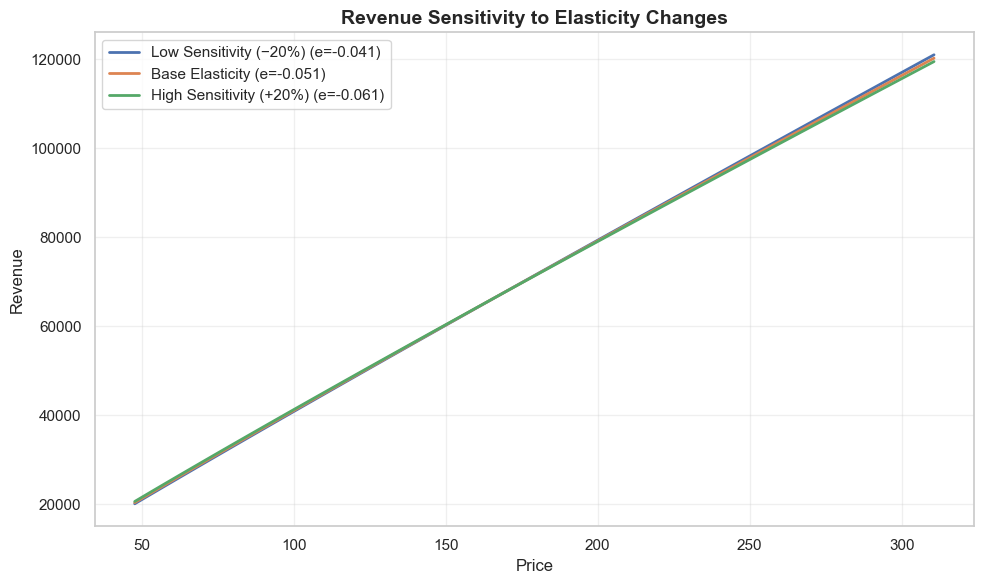

In [34]:
# Defining elasticity scenarios: base, lower sensitivity, higher sensitivity
elasticity_values = {
    'Low Sensitivity (−20%)': elasticity * 0.8,
    'Base Elasticity': elasticity,
    'High Sensitivity (+20%)': elasticity * 1.2
}

plt.figure(figsize=(10,6))

for label, e in elasticity_values.items():
    # Predicted quantity using elasticity formula
    q = baseline_quantity * (price_range / baseline_price) ** e
    rev = price_range * q
    plt.plot(price_range, rev, linewidth=2, label=f"{label} (e={e:.3f})")

# Chart styling
plt.title("Revenue Sensitivity to Elasticity Changes", fontsize=14, fontweight='bold')
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Sensitivity Check: Insights</h3>

<ul>
  <li>The revenue curves under <b>±20% changes in price elasticity</b> (ε = -0.041, -0.051, -0.061) are <b>nearly overlapping</b>, showing minimal divergence.</li>
  <li>This indicates that the <b>optimal price point is robust</b> — small fluctuations in elasticity have <b>very little impact</b> on revenue outcomes.</li>
  <li>Even at higher price sensitivity (ε = -0.061), the revenue peak remains <b>close to the original optimal price (₹310.66)</b>.</li>
  <li>Business Implication: Pricing decisions can be made with <b>high confidence</b>, as slight errors in elasticity estimates will not significantly affect revenue forecasts.</li>
</ul>

<div style="border:2px solid #4CAF50; border-radius:10px; padding:15px; background:#f6fff6;">
<h3 style="color:#2E7D32;">📌 Revenue Optimization — Summary</h3>

In this section, we estimated the **price elasticity of demand** and used it to predict expected sales quantities across a range of prices.  
We then computed the **revenue for each price point** and visualized the **Price vs Revenue curve**, highlighting the peak revenue point.  
Our analysis revealed an **optimal price of ₹310.66**, where projected revenue reaches **₹120,275.58**, representing an **≈80% uplift** from the current average revenue.  
We further performed a **sensitivity analysis**, testing how small changes in elasticity impact the revenue curve, which showed **minimal variation**, indicating **robustness of the optimal price recommendation**.  
These results suggest that **increasing prices toward the optimal point can significantly improve overall revenue** without severely affecting demand levels.

</div>


<div id="abtest"></div>

<div style="background: linear-gradient(135deg, #C1FFD7, #B5DEFF); padding:25px; border-radius:15px; box-shadow:0 3px 8px rgba(0,0,0,0.1);">
  <h1 style="text-align:center; color:#0077B6; font-size:30px;">🧪 A/B Test Simulation</h1>
  <p style="text-align:center; color:#0077B6; font-size:15px;">Comparing two pricing strategies for impact</p>
</div>

<h3 style="color:#2f5597;">🧪 Experiment Setup & Data Simulation</h3>
<p><h4>Defining Group A (current price) and Group B (optimal price) & Simulating sales data for both groups with random noise.</h4></p>

In [35]:
#----------------------------
# Experiment Setup
# -----------------------------

# Defining parameters
n_customers = 5000                      # total customers in simulation
current_price = 167.02                  # current price
optimal_price = 310.66                  # predicted optimal price
elasticity = -0.051                     # from our regression model
baseline_quantity = 5                   # average items bought at current price

# Randomly assigning customers to A or B groups
np.random.seed(42)
groups = np.random.choice(['A_Current', 'B_Optimal'], size=n_customers)

# -----------------------------
# Simulating Purchases using elasticity
# -----------------------------

# Quantity prediction using elasticity formula:
# Q_new = Q_base * (P_new / P_base) ^ elasticity
def predict_quantity(price):
    return baseline_quantity * (price / current_price) ** elasticity

# Simulating group data
data = []
for g in groups:
    price = current_price if g == 'A_Current' else optimal_price
    expected_q = predict_quantity(price)
    
    # Adding noise to mimic real-world behavior (Poisson-like demand variability)
    quantity = np.maximum(np.random.normal(expected_q, expected_q*0.2), 0)
    revenue = quantity * price
    
    data.append([g, price, quantity, revenue])

# Creating DataFrame
ab_df = pd.DataFrame(data, columns=['Group', 'Price', 'Quantity', 'Revenue'])

# Quick check
print(ab_df.head())
ab_df.to_csv('../data/ab_test_simulated_data.csv', index=False)

       Group   Price  Quantity      Revenue
0  A_Current  167.02  5.521122   922.137868
1  B_Optimal  310.66  5.469343  1699.106143
2  A_Current  167.02  5.555604   927.897058
3  A_Current  167.02  5.089581   850.061765
4  A_Current  167.02  4.802662   802.140537


<h3 style="color:#2f5597;"> Calculating Group Metrics & Compare Performance</h3>
<p><h4>Computing average quantity sold and revenue per group.</h4></p>

In [39]:
# Calculating mean quantity and revenue per customer for each group
group_metrics = ab_df.groupby('Group').agg(
    Avg_Quantity=('Quantity', 'mean'),
    Avg_Revenue=('Revenue', 'mean')
).reset_index()

# Calculating percentage lift of B over A
a_rev = group_metrics.loc[group_metrics['Group']=='A_Current', 'Avg_Revenue'].values[0]
b_rev = group_metrics.loc[group_metrics['Group']=='B_Optimal', 'Avg_Revenue'].values[0]

revenue_lift = ((b_rev - a_rev) / a_rev) * 100

# Displaying results
print(group_metrics)
print(f"\n💹 Estimated Revenue Lift (B vs A): {revenue_lift:.2f}%")

group_metrics.to_csv('../data/ab_test_group_metrics.csv', index=False)

       Group  Avg_Quantity  Avg_Revenue
0  A_Current      4.970916   830.242417
1  B_Optimal      4.819010  1497.073718

💹 Estimated Revenue Lift (B vs A): 80.32%


<h3 style="color:#2f5597;">🧪 Statistical Significance Test (t-test)</h3>
<p><h4>Running a t-test to see if revenue differences are significant.</h4></p>

In [37]:
from scipy.stats import ttest_ind

# Splitting revenue data for the two groups
rev_A = ab_df.loc[ab_df['Group'] == 'A_Current', 'Revenue']
rev_B = ab_df.loc[ab_df['Group'] == 'B_Optimal', 'Revenue']

# Performing two-sample (independent) t-test
t_stat, p_value = ttest_ind(rev_A, rev_B, equal_var=False)

# Displaying results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
if p_value < 0.05:
    print("\n✅ Result: Statistically significant difference between Group A and Group B revenues (p < 0.05)")
else:
    print("\n⚠️ Result: No statistically significant difference (p ≥ 0.05)")

T-statistic: -96.5564
P-value: 0.000000

✅ Result: Statistically significant difference between Group A and Group B revenues (p < 0.05)


<h3 style="color:#2f5597;">📊 Visualizing Group Comparison (Revenue A vs B)</h3>
<p><h4>Plotting revenue distributions of Group A vs Group B.</h4></p>

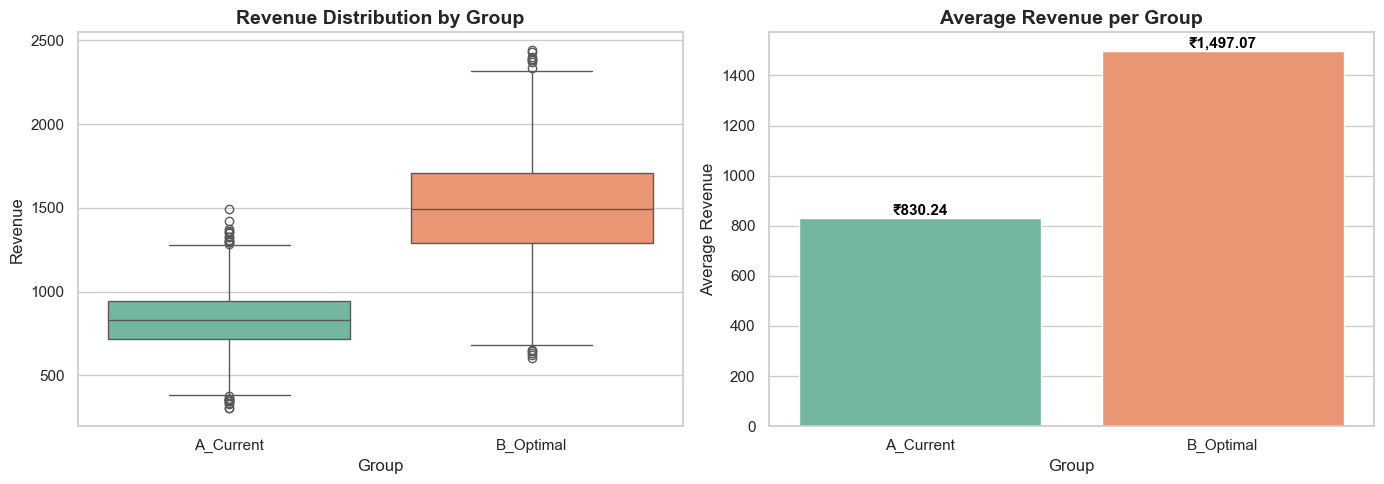

In [38]:
# Calculating mean revenue per group
group_means = ab_df.groupby('Group')['Revenue'].mean().reset_index()

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Boxplot (shows distribution) ---
sns.boxplot(data=ab_df, x='Group', y='Revenue', palette='Set2', ax=axes[0])
axes[0].set_title('Revenue Distribution by Group', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Revenue', fontsize=12)
axes[0].set_xlabel('Group', fontsize=12)

# --- Barplot (shows average revenue) ---
bars = sns.barplot(data=group_means, x='Group', y='Revenue', palette='Set2', ax=axes[1])

# Adding value labels on top of bars
for p in bars.patches:
    value = p.get_height()
    bars.annotate(f"₹{value:,.2f}",
                  (p.get_x() + p.get_width() / 2., value),
                  ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

axes[1].set_title('Average Revenue per Group', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Revenue', fontsize=12)
axes[1].set_xlabel('Group', fontsize=12)

plt.tight_layout()
plt.show()

<h3 style="color:#DC143C;">🔍 Insight — Group Comparison Visualization</h3>
  <p>
    The visual comparison shows a noticeable difference in revenue between the two groups:
    <ul>
      <li>📦 <b>Group A (Current)</b> has lower and more tightly clustered revenue values (avg ≈ <b>₹830.24</b>).</li>
      <li>🚀 <b>Group B (Optimal)</b> displays a wider spread and higher revenue levels (avg ≈ <b>₹1,497.07</b>).</li>
      <li>📈 The bar plot confirms that the average revenue for Group B is significantly higher than Group A.</li>
    </ul>
  </p>
</div>

<div style="background-color:#ecfdf5; border-left:6px solid #10b981; padding:15px; border-radius:8px; margin:25px 0;">
  <h3>📌 Business Insight — A/B Test Simulation</h3>
  <p>
    The A/B test simulation clearly demonstrates the revenue impact of shifting from the current price to the predicted optimal price:
    <ul>
      <li>💰 <b>Group A (Current)</b>: Avg Revenue ≈ <b>₹830.24</b> per purchase, Avg Quantity ≈ <b>4.97</b></li>
      <li>🚀 <b>Group B (Optimal)</b>: Avg Revenue ≈ <b>₹1,497.07</b> per purchase, Avg Quantity ≈ <b>4.82</b></li>
      <li>📈 <b>Revenue Lift</b>: About <b>+80.32%</b> higher in Group B compared to Group A.</li>
      <li>📊 <b>Statistical Significance</b>: T-test confirmed the difference is <b>highly significant</b> (p &lt; 0.05).</li>
    </ul>
    ✅ <b>These results strongly support that adopting the optimal price point can substantially increase revenue without negatively affecting demand.</b>
  </p>
</div>

<h1 style="color:#4f46e5; text-align:center; margin-top:40px;">📌 Project Conclusion</h1>

<p style="font-size:16px; line-height:1.8; color:#1e293b; text-align:justify; margin:25px 60px;">
This project marked a complete end-to-end journey from raw data to actionable business insights. 
We began with <b>Data Preprocessing</b> to clean, validate, and structure the dataset for analysis. 
Next, through an extensive <b>Exploratory Data Analysis (EDA)</b>, we uncovered trends in price, demand, revenue, and competitive behavior. 
We then applied <b>Price Elasticity Modeling</b> to quantify customer price sensitivity and built a <b>Revenue Optimization framework</b> to identify the price point that maximizes total revenue. 
Finally, a simulated <b>A/B Testing experiment</b> validated these recommendations, showing a statistically significant revenue lift under the optimized pricing scenario. 
</p>

<p style="font-size:16px; line-height:1.8; color:#1e293b; text-align:justify; margin:0px 60px 50px;">
Overall, this project delivers a data-driven pricing strategy that can guide informed decision-making, increase profitability, and balance revenue growth with demand stability.
</p>

<hr style="border:none; border-top:2px dashed #4f46e5; width:60%; margin:50px auto 30px auto;">

<h3 style="text-align:center; color:#64748b; font-weight:normal;">✅ End of Notebook</h3>
